# 경사 하강법 (Gradient Descent)

### 잔차제곱합 (Residual Sum of Squares, RSS)
- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회귀 모델의 정확도를 측정하는 지표
    - RSS가 작을수록 정확하게 예측하는 모델
    - RSS가 클수록 잘못된 예측을 하는 모델

- 모든 회귀 모델은 RSS가 최소가 되는 방향으로 학습이 진행됨 = **회귀계수(절편)** 는 RSS가 최소가 되도록 학습
- 비용함수 R(w)가 가장 작을 때의 w를 찾는 것이 회귀 모델의 목표
    - 매 회차에 계산된 R(w)에서 순간 변화율(기울기)를 구해야 함 -> 미분 사용
    - 단, 우리가 구해야 하는 회귀계수는 하나 이상이므로 우리는 편미분을 사용함 (회귀계수는 특성마다(차수마다) 붙어있어서 하나 이상임)
        - w0(절편)을 고정한 채로 w1의 미분을 구하고, w1을 고정한 채로 w0의 미분을 구함

### 학습률 (Learning Rate)
- 최적의 해를 빠르게 혹은 천천히 조금씩 찾아가는 '정도'를 가르키는 하이퍼 파라미터 
- 기본 값으로 보통 0.001을 사용
- 학습률은 우리가 직접 모델에 지정해줄 수 있고, 학습률에 따라 최적의 해를 찾아갈 수 있음

**경사하강법 수식**

$w_1$ $w_0$을 반복적으로 업데이트하며 최적의 회귀계수를 찾음
<br/>
$w_1 = w_1 - (-η\frac{2}{N}\sum^{N}_{i=1} x_i * (실제값_i - 예측값_i))$
<br/>
$w_0 = w_0 - (-η\frac{2}{N}\sum^{N}_{i=1}(실제값_i - 예측값_i))$

**경사하강법 공식**

$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$ (회귀계수, N은 개수, x는 특성값)

$w0 = w0 - (미분값)$ (절편)

$w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

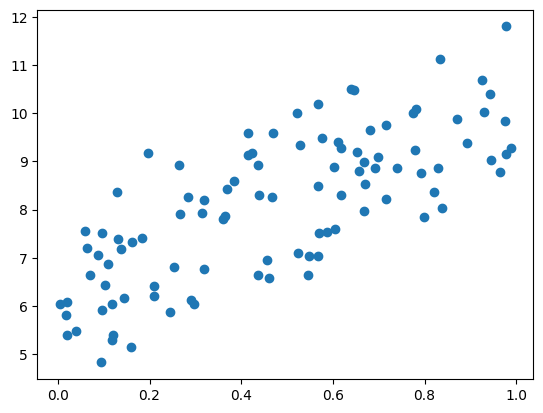

In [ ]:
# 랜덤한 값을 만들어서 산포되는 데이터를 보자
np.random.seed(0) # 난수 고정

# rand: 0에서 1 사이의 100개의 난수를 생성
# randn: 가우시안 표준 정규 분포에서 난수 메트릭 배열 생성
X = np.random.rand(100,1)
# print(x.shape)
# print(x) # 0에서 1 사이의 균등 분포를 가지는 난수가 생성

noise = np.random.randn(100,1) # 정규분포 난수를 노이즈로 사용
y = 6+4*X + noise # 절편이 6, x의 계수가 4

plt.scatter(X,y)
plt.show()

In [ ]:
# 경사 하강법 실행

# y = w1x + w0
# 회귀계수(가중치) 초기화
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

# 잔차 계산
y_pred = w0 + np.dot(X, w1) # 예측 값: 절편 + X와 w1을 내적
diff = y - y_pred   # 잔차 = 실제 값 - 예측 값

# 학습률
learning_rate = 0.01

# 데이터 개수
N = len(X)

# w0 편미분 (w0을 갱신할 값)
# w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)
w0_diff = -learning_rate * 2 / N * np.sum(diff) # 잔차의 합
# 절편(w0) 갱신
w0 = w0 - w0_diff

# w1 편미분 (w1을 갱신할 값)
# w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)
w1_diff = -learning_rate * 2 / N * np.dot(X.T, diff) # shape이 (100,1) (100,1)니까 T로 전치를 해야함 -> X를 전치하는 이유는 그래야 1,1의 shape이 나오니까
# 가중치(w1) 갱신
w1 = w1 - w1_diff

print(f'1회 업데이터된 회귀계수 w0: {w0}, w1: {w1}')

1회 업데이터된 회귀계수 w0: [[0.16167019]], w1: [[0.08298126]]


In [22]:
def gradient_descent(X, y):
    # 회귀계수(가중치) 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 학습률
    learning_rate = 0.01

    # 데이터 개수
    N = len(X)

    for i in range(100):
        # 잔차 계산
        y_pred = w0 + np.dot(X, w1)
        diff = y - y_pred

        # w0 편미분 (w0을 갱신할 값)
        # w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)
        w0_diff = -learning_rate * 2 / N * np.sum(diff) # 잔차의 합
        # 절편(w0) 갱신
        w0 = w0 - w0_diff

        # w1 편미분 (w1을 갱신할 값)
        # w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)
        w1_diff = -learning_rate * 2 / N * np.dot(X.T, diff) # shape이 (100,1) (100,1)니까 T로 전치를 해야함 -> X를 전치하는 이유는 그래야 1,1의 shape이 나오니까
        # 가중치(w1) 갱신
        w1 = w1 - w1_diff

        # 시각화
        plt.figure(figsize=(3,2))
        plt.scatter(X, y)
        plt.plot(X, y_pred, color='red')
        plt.show()

    return w0,w1

In [21]:
def cost_function(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

In [19]:
w0, w1 = gradient_descent(X, y)

print('최종 회귀 계수(가중치)', w1)
print('최종 회귀 계수(절편)', w0)


최종 회귀 계수(가중치) [[3.12252584]]
최종 회귀 계수(절편) [[5.96736791]]


In [ ]:
y_pred = 